# Rozhodovacie stromy

### Jakub Ševcech, Róbert Móro

IAU, 28.11.2019

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2019-w10

## Pýtať sa môžete na http://slido.com#iau2019-w10

# Spätná väzba z minulého týždňa

Co mam robiť ak ničomu nechápem a mám z tohto predmetu depresie ? :)

# Opakovacia otázka

# 1. Rozhodovacie stromy

# 2. Preučenie

# 3. Výber atribútov

# Rozhodovacie stromy

<img src="img/binary_tree.png" alt="Drawing" style="width: 500px;"/>

<img src="img/flowchart.jpg" alt="Drawing" style="width: 500px;"/>

<img src="img/one_does_not.jpg" alt="Drawing" style="width: 500px;"/>

<img src="img/guess-ill-just-explain-it.jpg" alt="Drawing" style="width: 500px;"/>

Príklad a časti vysvetlenia prebraté z:
* [IAML: Decision Trees - slides](http://www.inf.ed.ac.uk/teaching/courses/iaml/2011/slides/dt.pdf)
* [IAML: Decision Trees - video](https://www.youtube.com/playlist?list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO)
* [Decision tree pruning](https://www.ismll.uni-hildesheim.de/lehre/ml-08w/skript/decision_trees2.pdf)

Odporúčam pozrieť si vo voľnom čase


Predstavte si, že máte takéto dáta o tom ako niekto (volajme ho Jano) chodí hrať tenis a ku každému riadku máte informácie o počasí. Chcete vytvoriť model, ktorý bude predpovedať, či Jano pôjde hrať na ďalší deň.
<img src="img/data1.png" alt="Drawing" style="width: 500px;"/>

Ako by sa na takýchto dátach snažil predikciu spraviť rozhodovací strom?

Tento algoritmus by sa snažil vytvoriť pravidlá, kedy Jano chodí a kedy nechodí hrať. Snažil by sa "pochopiť" pravidlám v dátach. Ako?

# Rozhodovací strom je greedy, divide & conquer algoritmus.

Snaží sa rozdeliť dáta na základe hodnôt zvoleného atribútu tak, aby boli v podmnožinách pozorovania jednotné (ideálne len z jednej triedy).

Divide & conquer kvôli rozdeľovaniu na podmnožiny.

Greedy kvôli spôsobu výberu atribútu, ktorý použije ako pravidlo.


<img src="img/test.jpg" alt="Drawing" style="width: 500px;"/>

#  Kostra algoritmu:

1. Rozdeľ na podmnožiny
2. Sú podmnožiny čisté (obsahujú len pozorovania z jednej triedy)?
3. Ak áno: stop
4. Ak nie: rekurzívne opakuj


Skúsime si to vyskúšať na týchto dátach.

<img src="img/data2.png" alt="Drawing" style="width: 500px;"/>

Vyberme si atribút *Outlook* na základe ktorého to rozdelíme.



<img src="img/split-outlook.PNG" alt="Drawing" style="width: 500px;"/>
Rozdelilo sa nám to na 3 skupiny. Jedna je už čista, takže na nej sme už skončili a tie ďalšie dve budeme musieť ešte rekurzívne riešiť.

Keď je jasno, tak sa zdá, že keď si vyberieme vlhkosť, tak nám vzniknú čisté podmnožiny.



<img src="img/split-humidity.PNG" alt="Drawing" style="width: 500px;"/>
Teraz nám už vznikli čisté podmnožiny, takže tu sme skončili.

Teraz ešte pravá vetva. Tu sa dá rozdeliť podľa vetra.



<img src="img/split-wind.PNG" alt="Drawing" style="width: 500px;"/>

Všetky podmnožiny sú čisté, takže sme skončili a vznikol nám rozhodovací strom.


Ako teraz budeme klasifikovať nove pozorovanie?
<img src="img/dt-classif.PNG" alt="Drawing" style="width: 500px;"/>

# Teraz sme si vlastne ukázali priebeh algoritmu ID3 na vytvorenie rozhodovacieho stromu

<img src="img/id3.PNG" alt="Drawing" style="width: 500px;"/>

Tento algoritmus viac menej naraz vymysleli dvaja ľudia. Boli ale z rôznej domény, takže o sebe nevedeli. Stále platí rozdelenie medzi komunitami. ID3 máte implementovaný v Pythne a CART v R.

Otázne je, ako vybrať ten správny atribút na rozdelenie


<img src="img/which_attribute.PNG" alt="Drawing" style="width: 500px;"/>

Chceme metriku, ktorá nám dá vysokú hodnotu pre čisté podmnožiny a nízku pre nečisté (alebo naopak)

Podmienená pravdepodobnosť nie je dobrá, keďže tá nie je symetrická. Má dve extrémne hodnoty, ktoré by nás zaujímali, ale medzi nimi je presne to, čo nechceme. Ak by sme porovnávali dve pravdepodobnosti, tak nevieme jednoducho povedať, ktorá je lepšia.


<img src="img/entropy.PNG" alt="Drawing" style="width: 500px;"/>

# Interpretácia Entropie

Množstvo bitov informácie (per pozorovanie), ktoré potrebujeme na to, aby sme zaradili každé pozorovanie do správnej triedy.

Ak je to 50/50, tak pre každé pozorovanie potrebujeme 1 bit na to aby sme označili či patrí do triedy alebo nie. Ak to je iný pomer, tak potrebujeme menej, pretože nám stačí označiť pozorovania z menej početnej triedy. Ak sú všetky pozorovania z jednej triedy, tak ich nepotrebujeme označovať vôbec.


Pre Multiclass klasifikáciu je vzorec entropie

<img src="img/multiclass.PNG" alt="Drawing" style="width: 300px;"/>

<img src="img/information_gain.PNG" alt="Drawing" style="width: 500px;"/>

### information gain = mutual information

# Interpretácia Information gain

Koľko bitov istoty získame ak použijeme zvolený atribút na rozdelenie?

Ide vlastne o zmenu entropie pri použití rozdelenia pomocou zvoleného atribútu. Koľko informácie vlastne dané rozdelenie do dát pridáva.


## Veľká výhoda rozhodovacích stromov je priamočiara interpretovateľnosť natrénovaného modelu. Dajú sa z neho priamo vytvoriť pravidlá.

<img src="img/interpretable.PNG" alt="Drawing" style="width: 500px;"/>


# Čo s dátami, ktoré nie sú kategorické?

## Threshold split

Usporiadajte hodnoty atribútu a vyskúšajte hodnoty medzi hodnotami atribútu ako potenciálne hraničné hodnoty. 

<img src="img/threshold_split.PNG" alt="Drawing" style="width: 500px;"/>

Vyhodnotenie vhodnosti rôznych hraničných bodov pomocou zvolenej metriky (Entropy, Information gain, ...)

Stačí pozerať na hraničné body medzi pozorovaniami, kde sa mení trieda.

Väčšina knižníc to už má v sebe zabudované a nemusíte sa o to starať.


# Preučenie

Zastavovacia podmienka vytvárania stromu sú čisté listy. Čo ak nám v liste zostane len veľmi malo pozorovaní. Dajme tomu 1. 

* Vtedy je list určite čistý, ale bude sa dať taký strom použiť aj na testovacej sade? 
* Chyba na trénovanej sade bude 0, ale na testovacej bude asi pomerne vysoká. 
* Pravidlá, ktoré vytvorí budú veľmi zložité a budú veľmi zle zovšeobecniteľné. V podstate sa len naučí celú trénovaciu sadu naspamäť. 
* Bude pretrénovaný. 

<img src="img/overfitting.PNG" alt="Drawing" style="width: 500px;"/>


# Bias / Variance

S pretrénovaním úzko súvisia termíny bias (skreslenie) a viarance (variancia)


* **Bias** je chyba spôsobená aproximáciou zložitého problému jednoduchším modelom 

> Niečo nám v tom modely chyba

> Robíme nejakú systematickú chybu. 

* **Variancia** nám hovorí, ako veľmi by sa zmenil model, ak by sme použili inú trénovaciu sadu

> Hovorí nám to, aký nestály bude model na dátach, ktoré predtým nevidel

![bias-variance](img/bias-variance2.jpg)


## Pekne sa to vizualizuje na regresii

![overfit](img/overfit.png)

* Ak máme veľmi veľký bias, tak to znamená, že máme nedotrénovaný model (underfitting) a niečo nám v ňom chýba
* Ak máme veľkú varianciu, tak to indikuje, že sme model pretrénovali (overfitting)


## Celková chyba je zlozená z variancie a biasu

A z náhodného šumu v dátach

Tieto dve chyby nevieme od seba oddeliť, ale snažíme sa nájsť bod, kde je ich súčet minimálny

![bias-variance](img/bias-variance.png)


## Tie dve chyby nevieme od seba oddeliť, ale ich súčet vieme odhadnúť pomocou chyby na validačnej vzorke

Snažíme sa nájsť takú zložitosť modelu, aby sme mali čo najmenšiu chybu na dátach, ktoré model nikdy nevidel

![validation error](img/validation-error.png)

Toto je vlastne prevrátený obrázok oproti tomu, ktorý som ukazoval pri preučení stromu pretože sme použili metriku merajúcu chybu a nie úspešnosť.


zdroj obrázkov:
* [http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html](http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html),
* [https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted) a 
* [http://scott.fortmann-roe.com/docs/BiasVariance.html](http://scott.fortmann-roe.com/docs/BiasVariance.html)


# Čo sa da spraviť na zabránenie pretrénovaniu

* Obmedziť rast stromu (maximálna hĺbka, minimálna veľkosť listu, minimálna veľkosť vnútorného uzlu, minimálny prírastok entropie pri rozdelení ...)
* Dodatočne orezávanie stromu (odstránenie podstromov a nahradenie predikciou majoritnej triedy v podstrome)


# Orezávanie (Pruning)
Veľa rôznych algoritmov. Väčšinou vyžadujú validačnú vzorku na overenie či orezanie zlepšilo strom. Pri pretrénovanom strome je chyba na trénovanej sade veľmi malá a každé orezanie by ju zhoršilo. Preto potrebujeme validačnú sadu aby sme zistili či sa orezanie nejak prejaví aj na nej.

## Reduced-Error Pruning
Najpopulárnejší algoritmus orezávania

1. Klasifikuj pozorovania z validačnej vzorky
2. Pre každý vnútorný uzol:
> a. Spočítaj chyby na pozorovaniach z validačnej vzorky, ktoré spadajú do podstromu. 
> b. Spočítaj chybu ak by sa podstrom nahradil predikciou majoritnej triedy trenovacích pozorovaní, ktoré spadajú do podstromu.
> Rozdiel týchto dvoch chýb je redukcia chyby na podstrome
3. Odstráň podstrom s najväčšou redukciou chyby na validačnej vzorke
4. Opakuj pokiaľ nastáva nejaká redukcia


## Rule Post-Pruning

1) Transformuj strom na pravidlá (jedno pravidlo pre každý prechod od koreňa k listom)

> Outlook=sunny ^ humidity=high -> No

> Outlook=sunny ^ humidity=normal -> Yes

> Outlook=overcast -> Yes

> Outlook=rain ^ wind=strong -> No

> Outlook=rain ^ wind=weak -> Yes

2) Pre každého predchodcu v pravidle: odstráň ho ak jeho odstránením klesne chyba na validačnej vzorke (v rámci jedného pravidla sa zastav ak už chyba neklesá)

3) Usporiadaj zostávajúce pravidlá podľa úspešnosti.


# Ukážka v Pythone

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
plt.rcParams['figure.figsize'] = 9, 6

# Načítam si všetky dáta. Trénovacie a aj jedno testovacie pozorovanie

In [3]:
data = pd.read_csv('tenis.csv')
data

,Humidity,Outlook,Play,Wind
0,High,Sunny,No,Weak
1,High,Sunny,No,Strong
2,High,Overcast,Yes,Weak
3,High,Rain,Yes,Weak
4,Normal,Rain,Yes,Weak
5,Normal,Rain,No,Strong
6,Normal,Overcast,Yes,Strong
7,High,Sunny,No,Weak
8,Normal,Sunny,Yes,Weak
9,Normal,Rain,Yes,Weak


In [4]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion='entropy')

X = data.loc[data.index < 14, ['Humidity', 'Outlook', 'Wind']]
y = data.loc[data.index < 14, 'Play']
cls.fit(X, y)

ValueError: could not convert string to float: 'High'

# Scikit-learn vie pracovať len s numerickými hodnotami

Potrebujeme teda spraviť kódovanie

In [5]:
# One-hot kodovanie vsetkych dat okrem predikovaneho stlpcu
encoded = pd.concat([pd.get_dummies(data[column], prefix=column) for column in set(data.columns) - {'Play'}], axis=1)
encoded

,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,Outlook_Overcast,Outlook_Rain,Outlook_Sunny
0,1,0,0,1,0,0,1
1,1,0,1,0,0,0,1
2,1,0,0,1,1,0,0
3,1,0,0,1,0,1,0
4,0,1,0,1,0,1,0
5,0,1,1,0,0,1,0
6,0,1,1,0,1,0,0
7,1,0,0,1,0,0,1
8,0,1,0,1,0,0,1
9,0,1,0,1,0,1,0


# Pozor, v predchádzajúcom kóde som trochu podvádzal. Kto vie čo som spravil zle?

# Použil som testovacie dáta na natrénovanie transformácie. 

Posledné pozorovanie patrí do testovacích dát. One hot encoder, ktorý som použil sa pozrel na všetky unikátne hodnoty v dátach vrátane testovacích a vytvoril pre každú unikátnu hodnotu nový stĺpec. 

Čo by sa stalo ak by som v testovacích dátach mal hodnotu, ktorá sa v trenovacích nenachádza?

Čo by sa malo stať po správnosti?


# Vyberiem si len trénovacie dáta a natrénujem klasifikátor

In [6]:
X = encoded[encoded.index < 14]
y = data.loc[data.index < 14, 'Play']

cls.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
test = encoded[encoded.index == 14]
cls.predict(test)

array(['Yes'], dtype=object)

# Natrénovaný strom si môžem vizualizovať

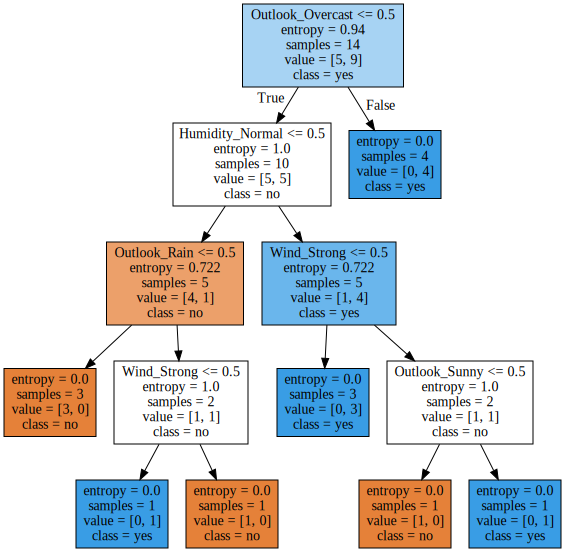

In [8]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(cls, 
                               out_file=None,
                               feature_names=encoded.columns,
                               class_names=['no', 'yes'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

# Stromček nevyzerá úplne rovnako ako ten, ktorý sme ukazovali na začiatku. Je to spôsobené one-hot kódovaním. Vieme robiť len binárne rozhodnutia.

# Ukážka - Pretrénovanie

In [9]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Rozdelíme údaje
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=4)

print('# train data: ', len(X_train))
print('# test data: ', len(X_test))

# train data:  455
# test data:  114


## Natrénujem si viacero stromov, kde každému obmedzím jeho maximálnu hĺbku aby som vytvoril stromy s rôznou zložitosťou

In [11]:
results = []
estimators = []
for i in range(1, X_train.shape[1] + 1):  
    row = {'model_complexity': i}
    # Vytvoríme rozhodovací strom
    clf = DecisionTreeClassifier(max_depth = i) # strom s maximalnou hlbkou 1-pocet atributov,  simulujeme tak zlozitost modelu
    
    pred = clf.fit(X_train, y_train).predict(X_train) # natrenovanie modelu a predikovanie na trenovacej sade
    row['train'] = 1-accuracy_score(y_train, pred) # chyba na trenovacej sade
    
    pred = clf.predict(X_test)
    row['test'] = 1-accuracy_score(y_test, pred) # chyba na testovacej sade
    results.append(row)
    estimators.append(clf)

In [12]:
complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,train,test
0,1,0.065934,0.140351
1,2,0.052747,0.131579
2,3,0.021978,0.114035
3,4,0.017582,0.105263
4,5,0.008791,0.096491


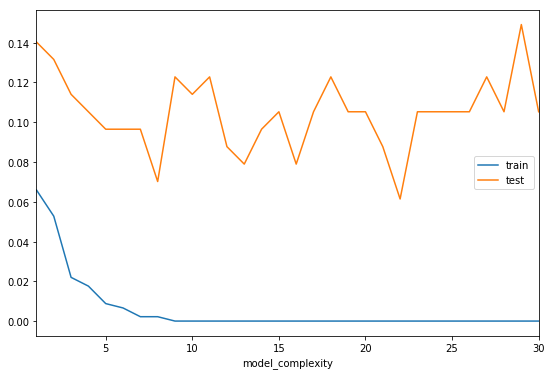

In [13]:
complexity_df.plot(x='model_complexity')

S rastúcou zložitosťou modelu sa mi nijak nezmenšuje chyba na trénovanej vzorke. Na testovacej tiež nie. Väčšinou sa dokonca zväčšuje. Toto je indikátor toho, že sme ten model preučili. Naučil sa dáta a nie vzťahy za nimi. Model zle zovšeobecňuje / generalizuje vzory v dátach. Ak skúšame predikciu na iných dátach, tak narazíme na veľkú chybu spôsobenú varianciou.

# Môžeme si skúsiť vizualizovať rôzne natrénované modely

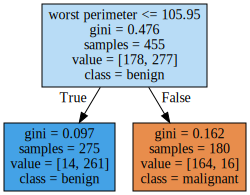

In [14]:
graph = Source(export_graphviz(estimators[0], # len jeden atribut pouzity na rozhodnutie
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

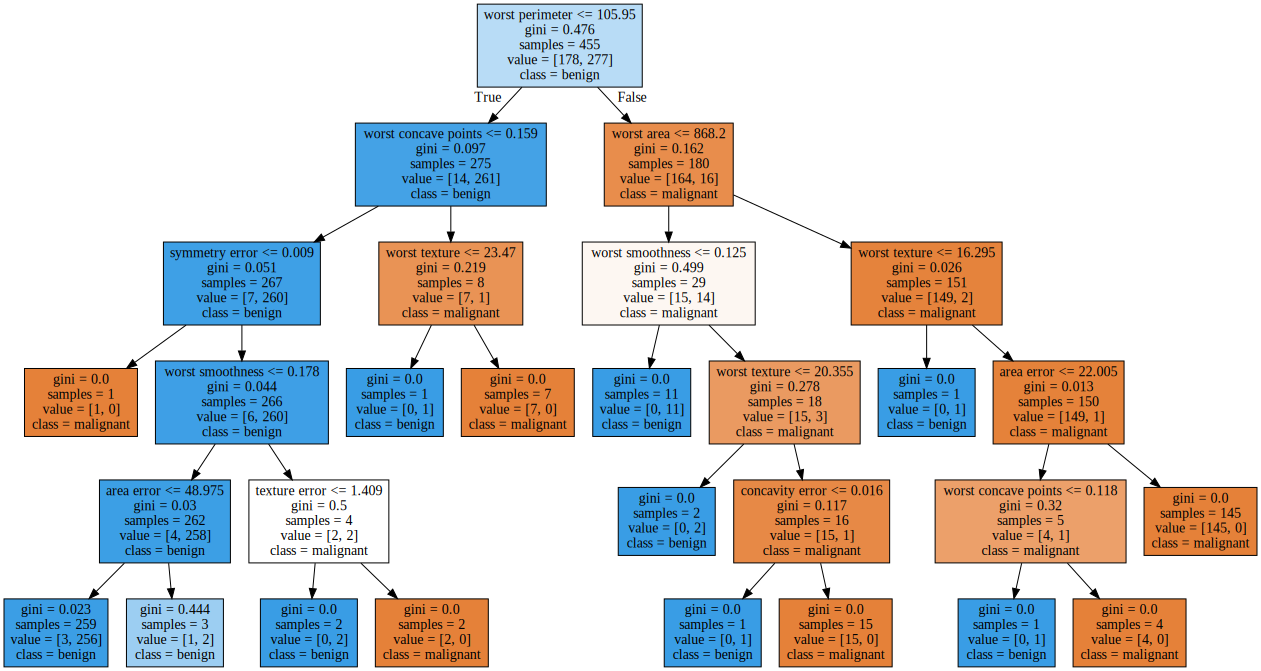

In [15]:
graph = Source(export_graphviz(estimators[4], # model, za ktorym zacala rast chyba na validacnej vzorke
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

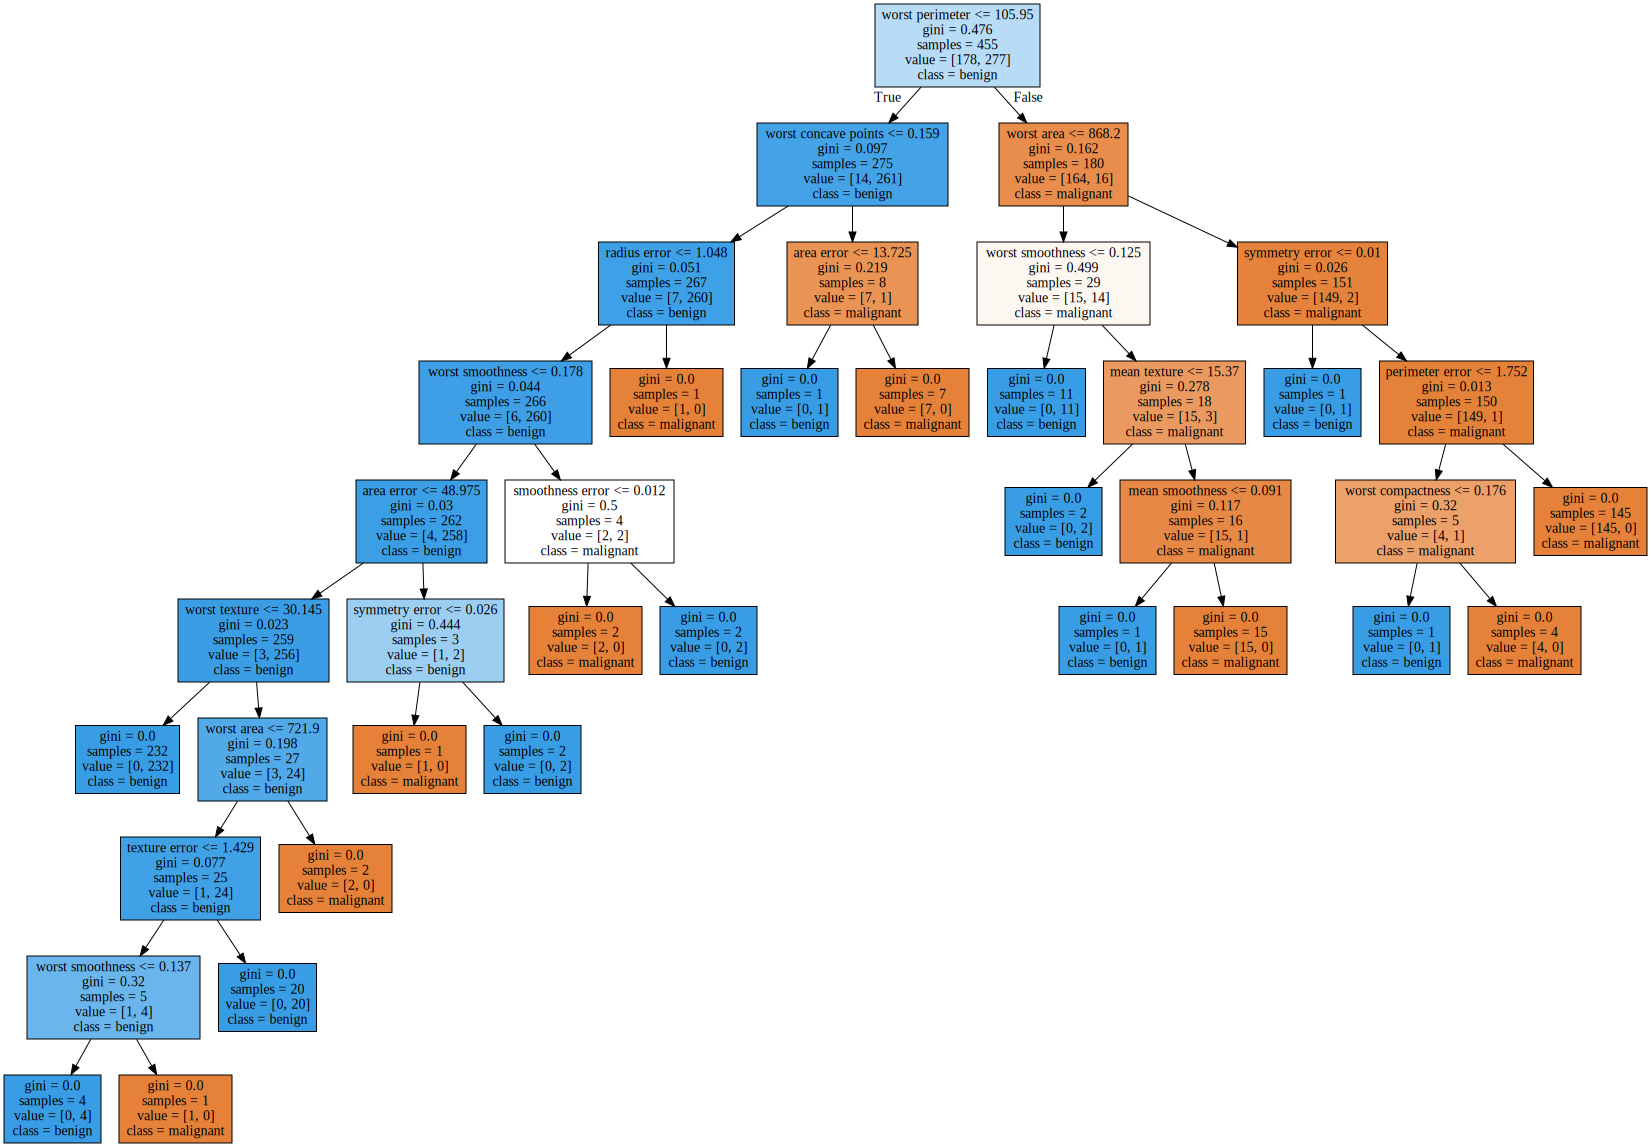

In [16]:
graph = Source(export_graphviz(estimators[-1], # najzlozitejsi model
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:40% !important;height:40% !important;}</style>"
HTML(style)

# Existujú viaceré spôsoby ako riešiť pretrénovanie a kontrolovať varianciu a bias

## Získať viac dát :)

## Učenie súborom metód (ensemble learning)
toto nemusíte teraz vedieť, ale je dobre ak poznáte, že také niečo existuje

* **Bagging** 

> Kombinovanie predikcii **nezávislých** modelov do jednej predikcie. Každý model musí byť **lepší ako náhoda**.

> Používa sa na zníženie variancie

* **Boosting** 

> Používa na zníženie biasu. Pozor, môže zvýšiť varianciu!

> Iteratívne trénovanie ďalších klasifikátorov so zvýšenou váhou na tie pozorovania, na ktorých sa predchádzajúcim modelom nedarilo


## Zjednodušenie modelu
* Výber atribútov
* Regularizácia
* Orezávanie stromov


# Výber atribútov

# Prečo by som mal vyberať len niektoré atribúty?

* redundancia - skryté závislosti medzi nimi 
* irelevancia - nemusia mat žiadny vplyv na predikovanú hodnotu
* pretrénovanie - model sa dá natrénovať aj na náhodných dátach a na trénovanej sade bude fungovať. Na testovacej ale bude fungovať úplne strašne
* prekliatie dimenzionality - pri veľkom počte atribútov potrebujem veľa dát na to aby som dostatočne pokryl priestor možných hodnôt
* produktivita / rýchlosť - moja ako analytika a aj mojich modelov (trénovanie aj predikcia)
* zrozumiteľnosť - ľahšie sa vysvetľuje model, ktorý používa menej atribútov


# Existujú 3 skupiny prístupov na výber atribútov

> ## 1. Filter

> ## 2. Wrapper

> ## 3. Embedded


# 1. Filter

Výber atribútov bez ohľadu na model, ktorý sa chystáme trénovať.

Výber atribútov na základe zvolenej metriky atribútu.

* rýchle
* nezávislé na modeli (to je dobre aj zle: môžem ich použiť na rôzne modely, ale nedokážu využiť špecifické vlastnosti konkrétnych algoritmov)


# Najjednoduchšia možnosť je vyhodiť atribúty, ktoré majú všade rovnaké hodnoty

Pozor, nie malú varianciu. Hlavne pri nevyvážených triedach môžu byt práve takéto atribúty veľmi užitočné


In [17]:
from sklearn.feature_selection import VarianceThreshold

X = np.array([[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]])
X

array([[0, 2, 0, 3],
       [0, 1, 4, 3],
       [0, 1, 1, 3]])

In [18]:
selector = VarianceThreshold(threshold=0.0)
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

# Môžeme vyberať atribúty aj na základe závislosti atribútu a predikovanej hodnoty

In [19]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # daju sa pouzit aj ine metriky

iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

## Metriku ako napríklad Chi kvadrát použijeme na kvantifikovanie závislosti k predikovanej premennej.

Najlepšie atribúty necháme


In [20]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

## Dajú sa používať rôzne metriky
> Klasifikácia
* chi2 - nezáporné čísla
* mutual_info_classif - diskrétne dáta
* f_classif - ANOVA medzi predikovanou premennou a atribútmi

> Regresia
* f_regression - F test medzi predikovanou hodnotou a atribútmi
* mutual_info_regression - Mutual information na reálnych číslach


## Dá sa vyberať K najlepších alebo nejaký percentil alebo nechať počet atribútov na štatistický test

* SelectKBest 
* SelectPercentile

* SelectFpr - false positive rate
* SelectFdr - false discovery rate  
* SelectFwe - family wise error

* GenericUnivariateSelect - Všetko dohromady a stratégia sa dá nastaviť parametrom


# Vlastnosti filtrov

* väčšinou rýchle
* nezávislé na modely (nepotrebujem opakovane trénovať model ale vybrané atribúty nemusia byt najvhodnejšie pre každý model)
* väčšinou sa pozerajú len na vlastnosti dvojíc predikovaná premenná - atribút, kombinácie viacerých atribútov nezohľadňujú


# Varovanie, PCA sa často používa na redukciu dimenzionality ale nie na výber atribútov

Je to častá chyba

PCA **vytvára nové** atribúty ako **lineárnu kombináciu** pôvodných. Nevyberá z pôvodných.

Ak použijeme dôležitosť atribútov, ktoré vstupujú do PCA, tak získame len ich varianciu. To je ekvivalentné s VarianceThreshold spomenutým vyššie. Aby sme toto získali, tak nemusíme počítať celé PCA. Stačí nám variancia každého atribútu oddelene. 

Navyše do PCA by mali vstupovať dáta s normalizovanou varianciou, takže by sme namiesto variance score pre každý atribút dostali stále rovnakú hodnotu.


# 2. Wrapper

# Základná myšlienka

hľadáme podmnožinu atribútov, na ktorej bude model dávať najlepšie výsledky

Skúšame rôzne podmnožiny, opakovane trénujeme nové modely a vyberáme tú najlepšiu podmnožinu, na ktorej model funguje najlepšie


# Problém

Ak máme dataset s N atribútmi, tak počet rôznych podmnožín je $2^N$

To znamená, že by sme museli náš model natrénovať $2^N$ krát.

Chcelo by to nájsť proces, ktorý minimalizuje počet pokusov a zároveň maximalizuje úspešnosť modelu


# Greedy prístupy

Najčastejšie sa používajú greedy prístupy, ktoré postupne zväčšujú sadu atribútov (alebo zmenšujú) tak, že pridávajú (odoberajú) atribút tak aby sa čo najviac zvýšila (najmenej znížila) úspešnosť. Skúšajú rôzne podmnožiny atribútov, ktoré postupne zväčšujú alebo zmenšujú.


# Knižnica Mlxtend

* Sequential Forward Selection (SFS)
> Postupne zväčšuje množinu atribútov o ten, ktorý najviac prispel k zlepšeniu

> Začína s množinami veľkosti 1, vyberie najlepšiu a zafixuje atribút. K fixovanému atribútu pridá ďalší a vytvorí všetky možne podmnožiny veľkosti 2 s jedným zafixovaným atribútom. Vyberie najlepšiu ...

* Sequential Backward Selection (SBS)
> Postupne zmenšuje množinu atribútov o ten, ktorý najmenej pomáhal.

* Sequential Floating Forward Selection (SFFS)
> SFS s pokusom o vyhodenie už pridaných atribútov ak sa ukáže že veľmi nepomáhajú 

* Sequential Floating Backward Selection (SFBS)
> SBS s pokusom o pridanie už raz vyhodeného atribútu


# Scikit-Learn

* RFE - Recursive feature elimination
> Postupne vyhadzovanie atribútov, ktoré majú v modeli najnižšiu váhu (potrebujeme aby to model vedel povedať) 

* RFECV - RFE with cross-validation
> RFE s krízovou validáciou


# Priklad SFS

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, k_features=3, forward=True,  floating=False, verbose=2, scoring='accuracy', cv=0)
# pomocou tejto triedy vieme robit SFS, SFFS, SBS aj SFBS a dokonca aj pridat cross-validaciu

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2019-10-26 14:11:38] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2019-10-26 14:11:38] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2019-10-26 14:11:38] Features: 3/3 -- score: 0.9733333333333334

## Zoznamy najlepších podmnožín atribútov pre jednotlivé veľkosti podmnožín

In [24]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('1', '2', '3')}}

# 3. Embedded

# Hlavná myšlienka

Skombinovať výhody filtrov a wrapprov

Model, ktorý sa trénuje si bude priamo vyberať atribúty, ktoré sú pre neho najlepšie

Len málo modelov to podporuje

* Lineárne modely penalizované L1 (Lasso) alebo L1+L2 (Elastic Net) regularizáciou: SVM, Lineárna regresia, Logistická regresia ...

> Regularizácia zavádza do modelu penalizáciu za počet / veľkosť váh atribútov modelu. Nie je tam len chyba predikcie. Prirodzene sa tak vyberá jednoduchší model.

* RandomForest


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

# Po natrénovaní náhodného lesu viem vybrať dôležitosť atribútov.

Náhodný les je zjednodušene povedane: skupina stromov.

Viem sa pozrieť aké atribúty používajú stromy na rozhodovanie a ako vysoko sú v nich a podľa toho odvodiť ich dôležitosť.


In [26]:
clf = RandomForestClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

C:\Users\sevo_\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.05472823, 0.01440036, 0.37523871, 0.5556327 ])

In [27]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

# Čo si odniesť z prednášky?

* Rozhodovacie stromy sú pomerne jednoduchý ale zároveň veľmi silný nástroj.

* Pri stromoch sa veľmi dobre interpretuje natrénovaný model pomocou pravidiel.

* Pozor na pretrénovanie (nie len pri stromoch)

* Výber atribútov je dobrý na redukciu problému prekliatia dimenzionality.

> * Ak používate nejaký lineárny model alebo les, tak je zbytočné robiť filtre a ešte viac zbytočné robiť wrappre. Môžete využiť to, že sa dajú použiť na embedded výber atribútov

> * Ak nemáte čas na opakované trénovanie modelu, tak filtre môžu byt dostatočný hotfix. Treba ale zvážiť akú vlastnosť atribútov chcete použiť na nájdenie tých najdôležitejších. 

> * Ak máte čas spustiť trénovanie viac krát, tak asi najlepšia možnosť je SFFS alebo SFECV


<img src="img/potato-tree.jpg" alt="Drawing" style="width: 500px;"/>